In [1]:
from libraries import lib
import qutip as qt 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
N, J, Gamma = 5, 1, 0.1
vars = (N, J, Gamma)

In [4]:
input = lib.generate_input_torch(N)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
loss_fn = lib.TFIM_expectation_from_torch

In [5]:
model = KAN(width=[N, 4, 2], device=device) 
# 1 node fails (reaches -4.74), 2 nodes same as 1 node, 3 nodes reaches -4.82, 4 reaches correct GSE (1.2e-8)
# for some reason [N, 5, 5, 2] seems to work really well (4e-10)
# all struggle with symmetry as 

checkpoint directory created: ./model
saving model version 0.0


In [6]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(30):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [7]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print('est', calced)
print('true', actual)
print('error', (calced - actual)**2)

est -5.012399196624756
true -5.012510556199545
error 1.2400954897192953e-08


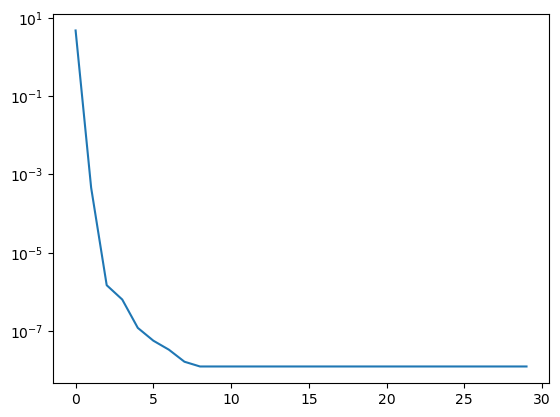

In [8]:
plt.plot(epochs, (np.array(loss_data) - np.array(len(loss_data) * [actual])) ** 2)
plt.yscale('log')
plt.show()

In [9]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs.full().flatten())
print(actual.full().flatten())
print('fidelity', qt.fidelity(gs, actual))

[ 5.78568637e-01-6.31203055e-01j  1.49043538e-02-1.58704761e-02j
  1.46573167e-02-1.40679153e-02j  1.55285362e-03-1.31084264e-04j
  1.49447257e-02-1.59712061e-02j -3.15927609e-05+4.94942333e-06j
  1.51367043e-03-1.29978594e-04j -5.48625074e-04-1.54614623e-04j
  1.41343959e-02-1.58570278e-02j  6.57510362e-04+2.41155385e-06j
 -9.79104894e-04-1.20916178e-04j -5.58101347e-05-2.70095661e-05j
  7.47661514e-04+2.21372193e-06j -2.43755188e-04-3.74574738e-05j
  6.33886375e-05+3.07123046e-05j -1.22251157e-02-3.30946292e-03j
  1.42641002e-02-1.60378683e-02j  8.61093402e-04-3.46870715e-04j
  3.82736907e-04-3.36269586e-05j -1.02438549e-04-4.97873771e-05j
  6.04065717e-04-2.44914845e-04j -7.23808247e-04-1.15293646e-04j
 -2.54428560e-05-1.23529690e-05j -1.26534551e-02-3.83543735e-03j
  9.57142620e-04-2.25707299e-05j  3.86187003e-06+1.32207049e-06j
 -4.34038695e-04-3.32217576e-04j -1.15835890e-02-4.65102820e-03j
  2.01624222e-04+6.90185043e-05j -1.27481548e-02-7.18965661e-03j
 -1.14202704e-02-4.592780

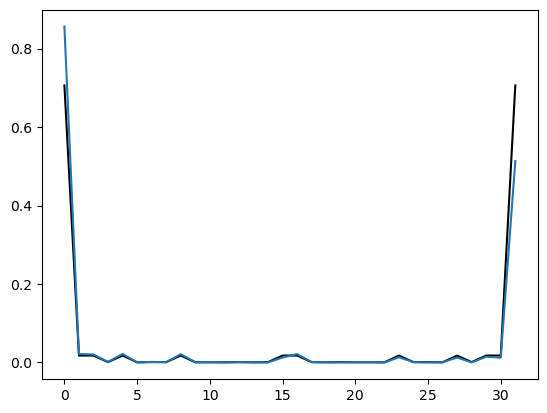

In [10]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(actual.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(gs.full().flatten()))
plt.show()

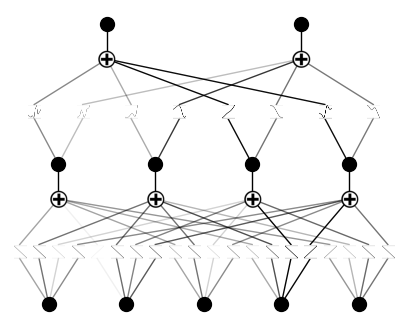

In [11]:
model.plot()

In [12]:
Gamma = 10
vars = (N, J, Gamma)

In [13]:
model = KAN(width=[N, 4, 2], device=device) 
# 1 node reaches -50, 2 reaches -50.10, 3 is also -50.10, 4 succeeds (1.8e-7)
# [N, 5, 5, 5, 2] works well (3.4e-8)

checkpoint directory created: ./model
saving model version 0.0


In [14]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(20):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [15]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print('est', calced)
print('true', actual)
print('error', (calced - actual)**2)

est -50.12467956542969
true -50.12510556199552
error 1.8147307409950234e-07


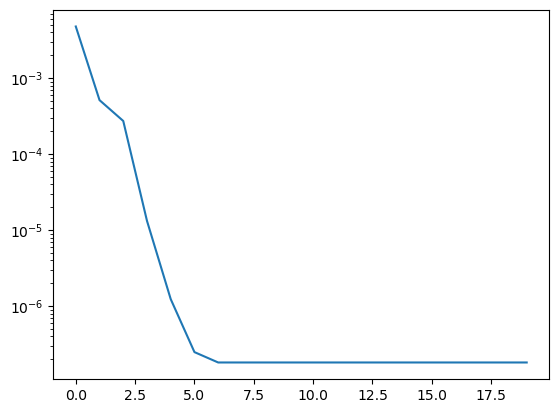

In [16]:
plt.plot(epochs, (np.array(loss_data) - np.array(len(loss_data) * [actual])) ** 2)
plt.yscale('log')
plt.show()

In [17]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs.full().flatten())
print(actual.full().flatten())
print('fidelity', qt.fidelity(gs, actual))

[0.19847935+0.01770269j 0.17955327+0.0157198j  0.17958222+0.01603793j
 0.17974952+0.01604794j 0.18083987+0.01608244j 0.16313314+0.01426593j
 0.18001066+0.01585525j 0.17974776+0.01593309j 0.17978141+0.01588045j
 0.16269131+0.01394305j 0.16229254+0.01437166j 0.16253597+0.01415391j
 0.1797726 +0.01599668j 0.16352986+0.01410339j 0.18026261+0.01603696j
 0.18058261+0.01587317j 0.18094091+0.01575678j 0.18011679+0.01597632j
 0.16299996+0.01439605j 0.17997204+0.01588065j 0.16257252+0.01412618j
 0.16264483+0.01447551j 0.16255751+0.01415044j 0.17965882+0.01578594j
 0.17998181+0.01579066j 0.18026292+0.01590609j 0.16317308+0.01462625j
 0.18092038+0.01590488j 0.17923261+0.01578646j 0.17984782+0.01597681j
 0.1802841 +0.01617858j 0.19848493+0.01760266j]
[0.20033466+0.j 0.18080245+0.j 0.18080245+0.j 0.18032783+0.j
 0.18080245+0.j 0.16360181+0.j 0.18032783+0.j 0.18032783+0.j
 0.18080245+0.j 0.16360181+0.j 0.16360181+0.j 0.16360181+0.j
 0.18032783+0.j 0.16360181+0.j 0.18032783+0.j 0.18080245+0.j
 0.18080

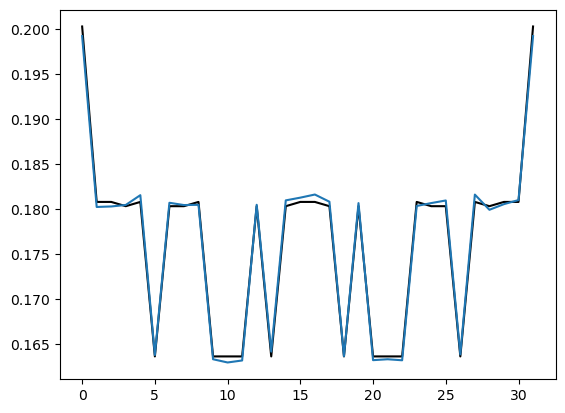

In [18]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(actual.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(gs.full().flatten()))
plt.show()

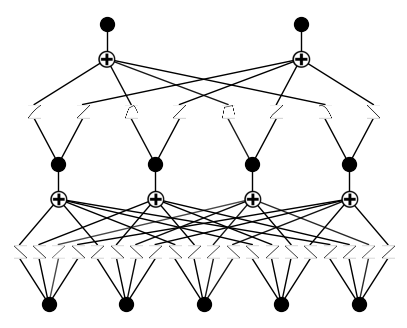

In [19]:
model.plot()

In [20]:
Gamma = 1
vars = (N, J, Gamma)

In [21]:
model = KAN(width=[N, 5, 2], device=device) 
# 1 reaches -6.15, 2 reaches -6.20, 3 reaches -6.44, 4 reaches -6.469, 5 reaches -6.4717 (1.5e-7)
# [N, 5, 5, 2] works super well 4e-10
# [N, 20, 2] has 6e-9

checkpoint directory created: ./model
saving model version 0.0


In [22]:
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(30):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [23]:
calced = loss_data[-1]
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]
print('est', calced)
print('true', actual)
print('error', (calced - actual)**2)

est -6.471836566925049
true -6.472135954999574
error 8.963321916805815e-08


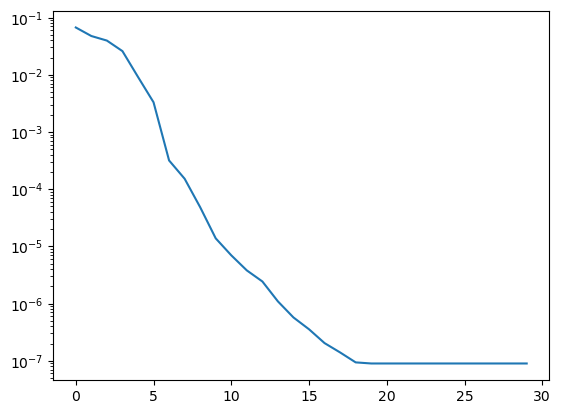

In [24]:
plt.plot(epochs, (np.array(loss_data) - np.array(len(loss_data) * [actual])) ** 2)
plt.yscale('log')
plt.show()

In [25]:
actual = lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[1][0]
print(gs.full().flatten())
print(actual.full().flatten())
print('fidelity', qt.fidelity(gs, actual))

[-0.52866656+0.13631923j -0.15678288+0.03792007j -0.15661225+0.03953015j
 -0.10487214+0.02807234j -0.15522669+0.04083533j -0.05440825+0.01510613j
 -0.10500701+0.02747723j -0.10582601+0.03014698j -0.15616569+0.03971919j
 -0.05566343+0.0146868j  -0.05518229+0.01466805j -0.05495491+0.0158098j
 -0.10475316+0.02800264j -0.05570255+0.01609259j -0.10380736+0.02694779j
 -0.15379898+0.04382956j -0.15530394+0.03981637j -0.10571713+0.02790556j
 -0.05513099+0.01391978j -0.1051461 +0.02917228j -0.05612998+0.01307376j
 -0.05538511+0.01543612j -0.05561657+0.01522785j -0.15259549+0.04319922j
 -0.1055401 +0.02727187j -0.10493025+0.02884851j -0.05645633+0.01418328j
 -0.15419745+0.04340776j -0.10551843+0.02688611j -0.15317139+0.04194644j
 -0.1538078 +0.04368861j -0.52234197+0.14499708j]
[-0.54406272+0.j -0.16018686+0.j -0.16018686+0.j -0.10881254+0.j
 -0.16018686+0.j -0.05743823+0.j -0.10881254+0.j -0.10881254+0.j
 -0.16018686+0.j -0.05743823+0.j -0.05743823+0.j -0.05743823+0.j
 -0.10881254+0.j -0.057438

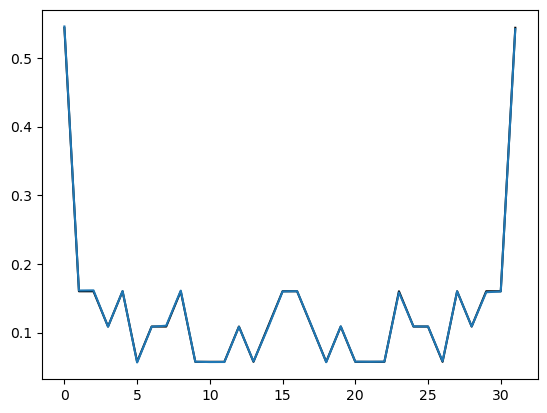

In [26]:
xvals = [n for n in range(0, 2 ** N)]
plt.plot(xvals, np.abs(actual.full().flatten()), color = 'black')
plt.plot(xvals, np.abs(gs.full().flatten()))
plt.show()

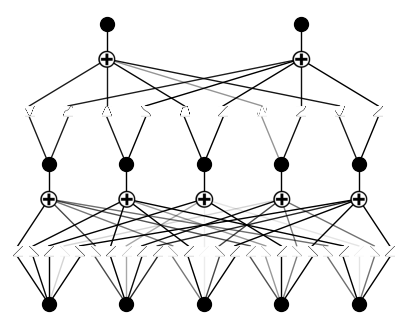

: 

In [ ]:
model.plot()